In [2]:
##All General Import Statements
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot
import os

In [3]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("creditcard.csv")
y_true=df['Class']
df_data = df.drop('Class',1)

In [7]:
df_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [8]:
y_true

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

Criar o dataset de treino e teste:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_data, y_true, test_size=0.3, random_state=42)

In [10]:
def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=df_data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

In [11]:
alg=IsolationForest( n_estimators=100, max_samples='auto', contamination=0.01, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0,behaviour="new")
alg

IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [13]:
%%timeit
if_mdlLst=train(X_train,alg)

4.3 s ± 51.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
if_mdlLst=train(X_train,alg)
if_mdlLst

[IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                 max_features=1.0, max_samples='auto', n_estimators=100,
                 n_jobs=-1, random_state=42, verbose=0, warm_start=False),
 IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                 max_features=1.0, max_samples='auto', n_estimators=100,
                 n_jobs=-1, random_state=42, verbose=0, warm_start=False),
 IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                 max_features=1.0, max_samples='auto', n_estimators=100,
                 n_jobs=-1, random_state=42, verbose=0, warm_start=False),
 IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                 max_features=1.0, max_samples='auto', n_estimators=100,
                 n_jobs=-1, random_state=42, verbose=0, warm_start=False),
 IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                 max_features=1.0, max_samples='auto'

In [19]:
%%timeit
if_y_pred = predict(X_test,if_mdlLst)
if_y_pred = 1 - if_y_pred

#Creating class labels based on decision function
if_y_pred_class = if_y_pred.copy()
if_y_pred_class[if_y_pred >= np.percentile(if_y_pred,95)] = 1
if_y_pred_class[if_y_pred < np.percentile(if_y_pred,95)] = 0

27.4 s ± 382 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
if_y_pred = predict(X_test,if_mdlLst)
print(if_y_pred)
if_y_pred = 1 - if_y_pred

#Creating class labels based on decision function
if_y_pred_class = if_y_pred.copy()
if_y_pred_class[if_y_pred >= np.percentile(if_y_pred,95)] = 1
if_y_pred_class[if_y_pred < np.percentile(if_y_pred,95)] = 0

[-0.14903578  0.16570134  0.19228584 ...  0.17977045  0.20801674
  0.21972716]


In [21]:
roc_auc_score(y_test, if_y_pred_class)

0.9057879792638215

In [22]:
f1_score(y_test, if_y_pred_class)

0.05307325924245861

In [23]:
if_cm = confusion_matrix(y_test, if_y_pred_class)

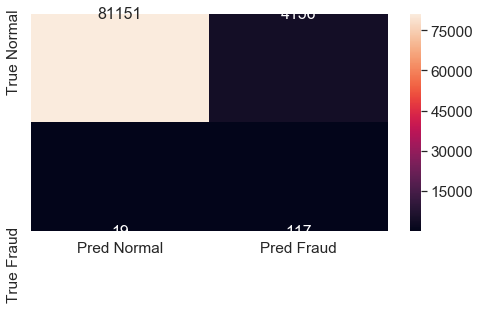

In [41]:
import seaborn as sn
     
df_cm = pd.DataFrame(if_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size